## Supervised learning and NLP
**Building a model to predict if a message is spam or not.**

The dataset **Spam** contains the subject lines and the target which takes values 0 and 1 for ham and spam respectively.

What is ham? It is currently defined and understood to be “E-mail that is generally desired and is not considered spam.”


What is Spam? It means unsolicited: You did not ask for messages from this source. So if you didn’t ask for the mail it must be spam.

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [2]:
spam_data = pd.read_csv('spam.csv')
spam_data.head(10)

,text,target
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
5,FreeMsg Hey there darling it's been 3 week's n...,spam
6,Even my brother is not like to speak with me. ...,ham
7,As per your request 'Melle Melle (Oru Minnamin...,ham
8,WINNER!! As a valued network customer you have...,spam
9,Had your mobile 11 months or more? U R entitle...,spam


In [3]:
spam_data['target'] = np.where(spam_data['target']=='spam',1,0)
spam_data.head(10)

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
5,FreeMsg Hey there darling it's been 3 week's n...,1
6,Even my brother is not like to speak with me. ...,0
7,As per your request 'Melle Melle (Oru Minnamin...,0
8,WINNER!! As a valued network customer you have...,1
9,Had your mobile 11 months or more? U R entitle...,1


In [4]:
spam_data['length'] = spam_data['text'].apply(len)
spam_data['length'].max()
spam_data

,text,target,length
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,U dun say so early hor... U c already then say...,0,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61
...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,161
5568,Will Ì_ b going to esplanade fr home?,0,37
5569,"Pity, * was in mood for that. So...any other s...",0,57
5570,The guy did some bitching but I acted like i'd...,0,125


In [5]:
ham = spam_data[spam_data['target']==0]
spam = spam_data[spam_data['target']==1]
ham

,text,target,length
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29
3,U dun say so early hor... U c already then say...,0,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61
6,Even my brother is not like to speak with me. ...,0,77
...,...,...,...
5565,Huh y lei...,0,12
5568,Will Ì_ b going to esplanade fr home?,0,37
5569,"Pity, * was in mood for that. So...any other s...",0,57
5570,The guy did some bitching but I acted like i'd...,0,125


Spam percentage = 13.406317300789663 %
Ham percentage = 86.59368269921033 %


c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ham(0) and Spam(1)', ylabel='count'>

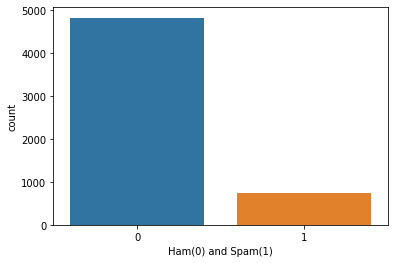

In [6]:
spam['length'].plot(bins=60, kind='hist') 
ham['length'].plot(bins=60, kind='hist') 
spam_data['Ham(0) and Spam(1)'] = spam_data['target']
print('Spam percentage =', (len(spam) / len(spam_data) )*100,"%")
print('Ham percentage =', (len(ham) / len(spam_data) )*100,"%")
sns.countplot(spam_data['Ham(0) and Spam(1)'], label = "Count") 

In [7]:
# Split the Data into Train and Test Dataset
X_train, X_test, y_train, y_test = train_test_split(spam_data['text'], spam_data['target'], random_state=0)
X_train.head()

872                       I'll text you when I drop x off
831     Hi mate its RV did u hav a nice hol just a mes...
1273    network operator. The service is free. For T &...
3314    FREE MESSAGE Activate your 500 FREE Text Messa...
4929    Hi, the SEXYCHAT girls are waiting for you to ...
Name: text, dtype: object

In [8]:
# Build the tf-idf on N-grams
# Fit and transform the training data X_train using a Tfidf Vectorizer ignoring terms that have a document 
# frequency strictly lower than 5 and using word n-grams from n=1 to n=3 (unigrams, bigrams, and trigrams)

vect = TfidfVectorizer(min_df=5, ngram_range=(1,3)).fit(X_train)
X_train_vectorized = vect.transform(X_train)
print(vect)

TfidfVectorizer(min_df=5, ngram_range=(1, 3))


In [9]:
# Add Features
# We apart from the tokens, we can add features such as the number of digits, the dollar sign , 
# the length of the subject line and the number of characters (anything other than a letter, 
# digit or underscore) . Let’s create a function for that.

def add_feature(X, feature_to_add):
    """
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    """
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

In [10]:
print(X_train_vectorized)

  (0, 3342)	0.3848355000495142
  (0, 3251)	0.12210051538966364
  (0, 3102)	0.21690848674045454
  (0, 2575)	0.39837938106227844
  (0, 2568)	0.2409266945100516
  (0, 1967)	0.29030759448659726
  (0, 1569)	0.4066868963923711
  (0, 1568)	0.3848355000495142
  (0, 1556)	0.21852537324796387
  (0, 825)	0.3573059964158254
  (1, 2491)	0.2816129600278037
  (1, 2486)	0.2816129600278037
  (1, 2424)	0.15440900952836356
  (1, 2348)	0.23667562306107923
  (1, 2304)	0.2222378553837101
  (1, 1967)	0.23321035440585086
  (1, 1879)	0.2434998129889521
  (1, 1711)	0.22490286564251932
  (1, 1658)	0.29669211345895263
  (1, 1437)	0.1620601255199983
  (1, 1415)	0.18537177914359518
  (1, 1315)	0.12514896867357334
  (1, 1216)	0.20946142769944906
  (1, 1199)	0.2528971315958035
  (1, 1159)	0.2767976967988618
  :	:
  (4176, 458)	0.19917527537400725
  (4176, 445)	0.25395816975460805
  (4176, 442)	0.2606277263046437
  (4176, 314)	0.13069381576768616
  (4177, 3251)	0.14886877053979514
  (4177, 3239)	0.34565372174155323
  

In [11]:
# Train Data
add_length=X_train.str.len()
add_digits=X_train.str.count(r'\d')
add_dollars=X_train.str.count(r'\$')
add_characters=X_train.str.count(r'\W')
 
X_train_transformed = add_feature(X_train_vectorized , [add_length, add_digits, add_dollars, add_characters])
print(X_train_transformed)

  (0, 825)	0.3573059964158254
  (0, 1556)	0.21852537324796387
  (0, 1568)	0.3848355000495142
  (0, 1569)	0.4066868963923711
  (0, 1967)	0.29030759448659726
  (0, 2568)	0.2409266945100516
  (0, 2575)	0.39837938106227844
  (0, 3102)	0.21690848674045454
  (0, 3251)	0.12210051538966364
  (0, 3342)	0.3848355000495142
  (0, 3383)	31.0
  (0, 3386)	8.0
  (1, 680)	0.279138415305129
  (1, 744)	0.20804186621106918
  (1, 824)	0.279138415305129
  (1, 1159)	0.2767976967988618
  (1, 1199)	0.2528971315958035
  (1, 1216)	0.20946142769944906
  (1, 1315)	0.12514896867357334
  (1, 1415)	0.18537177914359518
  (1, 1437)	0.1620601255199983
  (1, 1658)	0.29669211345895263
  (1, 1711)	0.22490286564251932
  (1, 1879)	0.2434998129889521
  (1, 1967)	0.23321035440585086
  :	:
  (4177, 753)	0.3799652331286877
  (4177, 1160)	0.22038992358853124
  (4177, 1535)	0.27496911567583626
  (4177, 1545)	0.4857166120706357
  (4177, 1577)	0.3434632847044672
  (4177, 2275)	0.4857166120706357
  (4177, 3239)	0.34565372174155323
  

In [12]:
# Test Data
add_length_t=X_test.str.len()
add_digits_t=X_test.str.count(r'\d')
add_dollars_t=X_test.str.count(r'\$')
add_characters_t=X_test.str.count(r'\W')

X_test_transformed = add_feature(vect.transform(X_test), [add_length_t, add_digits_t,  add_dollars_t, add_characters_t])
X_test_transformed

<1393x3387 sparse matrix of type '<class 'numpy.float64'>'
	with 23244 stored elements in Compressed Sparse Row format>

In [13]:
# Train the Logistic Regression Model
# We will build the Logistic Regression Model and we will report the AUC score on the test dataset:
    
clf = LogisticRegression(C=100, solver='lbfgs', max_iter=1000)
 
clf.fit(X_train_transformed, y_train)
 
y_predicted = clf.predict(X_test_transformed)
 
auc = roc_auc_score(y_test, y_predicted)
print(round(auc,4))

0.9653


c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


What does the AUC mean? --> Area under the ROC Curve
What is considered a good AUC? The AUC value lies between 0.5 to 1 where 0.5 denotes a bad classifer and 1 denotes an excellent classifier.

AUC or AUROC is area under ROC curve. The value of AUC characterizes the model performance. 
Higher the AUC value, higher the performance of the model.

In [14]:
# Get the Most Important Features
# We will show the 50 most important features which lead to either Ham of Spam respectively.

feature_names = np.array(vect.get_feature_names() + ['lengthc', 'digit', 'dollars', 'n_char'])
sorted_coef_index = clf.coef_[0].argsort()
smallest = feature_names[sorted_coef_index[:50]]
largest = feature_names[sorted_coef_index[:-51:-1]]
print('Features which lead to Ham:', smallest)

Features which lead to Ham: ['ì_ wan' 'for 1st' 'park' '1st' 'ah' 'wan' 'say' 'got' 'tomorrow' 'if'
 'ì_' 'my' 'call' 'opinion' 'days' 'gt' 'lovable' 'lt' 'its' 'sorry' 'all'
 'can' 'when' 'face' 'hope' 'she' 'pls' 'hav' 'lt gt' 'he' 'smile' 'wife'
 'for my' 'trouble' 'sir' 'hey' 'me' 'went' 'about me' '30' 'lovely'
 'me if' 'small' 'silent' 'sun' 'only' 'happy' 'my dad' 'them' 'mail']


In [15]:
# Features which lead to Spam:
print('Features which lead to Spam:', largest)

Features which lead to Spam: ['text' 'sale' 'free' 'content' 'uk' 'tones' 'sms' 'reply' 'order' 'won'
 'ltd' 'girls' 'ringtone' 'comes' 'to' 'darling' 'this message' 'what you'
 'www' 'new' 'std' 'co uk' 'about the' 'co' 'strong' 'user' 'txt' 'all of'
 'your' 'choose' 'service' 'mobile' 'the new' 'wap' 'sunshine' 'with'
 'xxx' 'sexy' 'hot' 'this' 'freemsg' 'ta' 'waiting for your' 'http'
 'll have' 'vodafone' 'asap' 'we need' 'stop' 'of the']


This is a practical and reproducible example of how to build a decent Ham or Spam algorithm. This is one of the main tasks in the field of **NLP**. 

The model achieved an AUC score of 96.5% on the test dataset which is really good. We were also able to add features and also to identify the features which are more likely to appear in a Spam email and vice versa.